In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


class HateSpeechAnalysis:
    def __init__(self,data_path):
        self.data = pd.read_csv(data_path)
        self.stop_words = set(stopwords.words('english'))
        
        
    def eda(self):
        # Display basic information about the dataset
        dataset_info = self.data.info()
        dataset_head = self.data.head()
        missing_values = self.data.isnull().sum()

        return dataset_info, dataset_head, missing_values

    def plot_label_distribution(self):
        # Plot label distribution
        plt.figure(figsize=(6,4))
        sns.countplot(x='Label', data=self.data, palette='viridis')
        plt.title('Label Distribution')
        plt.xlabel('Label (0 = Non-Hateful, 1 = Hateful)')
        plt.ylabel('Count')
        plt.show()

    def clean_text(self, text):
        text = re.sub(r'\W', ' ', text)  # Remove non-word characters
        text = text.lower()  # Convert to lowercase
        tokens = text.split()  # Split into tokens
        filtered_words = [word for word in tokens if word not in self.stop_words]  # Remove stop words
        return filtered_words

    def analyze_common_words(self):
        all_words = [word for content in self.data['Content'] for word in self.clean_text(content)]
        word_counts = Counter(all_words)
        most_common_words = word_counts.most_common(20)
        words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

        # Plot most common words
        plt.figure(figsize=(12,6))
        sns.barplot(x='Frequency', y='Word', data=words_df)
        plt.title('Top 20 Most Common Words')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.show()

    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luvkumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:

if __name__ == "__main__":
    analysis = HateSpeechAnalysis(data_path='HateSpeechDatasetBalanced.csv')  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726119 entries, 0 to 726118
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  726119 non-null  object
 1   Label    726119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB


C:\Users\luvkumar\AppData\Local\Temp\ipykernel_3464\1917700185.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=self.data, palette='viridis')


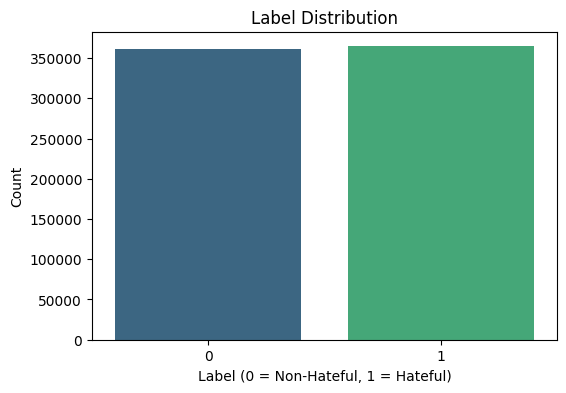

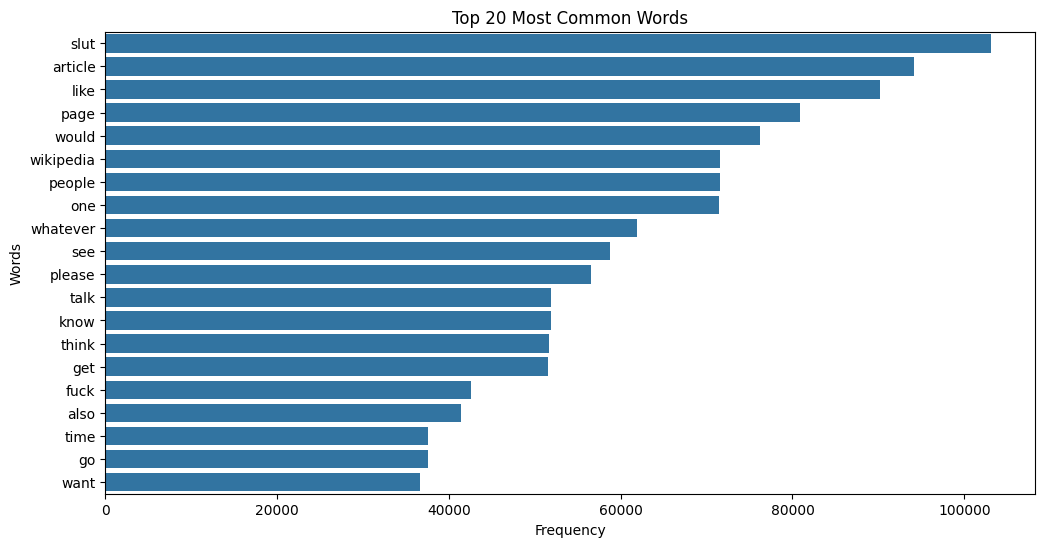

In [3]:

# EDA
analysis.eda()
analysis.plot_label_distribution()
analysis.analyze_common_words()

        